In [1]:
#EXERCISE 1
import langdetect
import matplotlib.pyplot
import nltk
import numpy
import pandas
import pyLDAvis
import pyLDAvis.sklearn
import regex
import sklearn

In [2]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rutujay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rutujay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
%matplotlib inline

In [4]:
#EXERCISE 2
path = "News_Final.csv"
df = pandas.read_csv(path, header=0)

In [5]:
def dataframe_quick_look(df, nrows):
    print("SHAPE:\n{shape}\n".format(shape=df.shape))
    print("COLUMN NAMES:\n{names}\n".format(names=df.columns))
    print("HEAD:\n{head}\n".format(head=df.head(nrows)))

dataframe_quick_look(df, nrows=2)

SHAPE:
(93239, 11)

COLUMN NAMES:
Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

HEAD:
    IDLink                                             Title  \
0  99248.0  Obama Lays Wreath at Arlington National Cemetery   
1  10423.0       A Look at the Health of the Chinese Economy   

                                            Headline     Source    Topic  \
0  Obama Lays Wreath at Arlington National Cemete...  USA TODAY    obama   
1  Tim Haywood, investment director business-unit...  Bloomberg  economy   

           PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0  2002-04-02 00:00:00        0.000000          -0.053300        -1   
1  2008-09-20 00:00:00        0.208333          -0.156386        -1   

   GooglePlus  LinkedIn  
0          -1        -1  
1          -1        -1  



In [6]:
print("TOPICS:\n{topics}\n".format(topics=df["Topic"].value_counts()))

TOPICS:
economy      33928
obama        28610
microsoft    21858
palestine     8843
Name: Topic, dtype: int64



In [7]:
raw = df["Headline"].tolist()
print("HEADLINES:\n{lines}\n".format(lines=raw[:5]))
print("LENGTH:\n{length}\n".format(length=len(raw)))

HEADLINES:
['Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor', 'Tim Haywood, investment director business-unit head for fixed income at Gam, discusses the China beige book and the state of the economy.', "Nouriel Roubini, NYU professor and chairman at Roubini Global Economics, explains why the global economy isn't facing the same conditions", "Finland's economy expanded marginally in the three months ended December, after contracting in the previous quarter, preliminary figures from Statistics Finland showed Monday. ", 'Tourism and public spending continued to boost the economy in January, in light of contraction in private consumption and exports, according to the Bank of Thailand data. ']

LENGTH:
93239



In [8]:
#EXERCISE 3
example = raw[5]
print(example)

Over 100 attendees expected to see latest version of Microsoft Dynamics SL and Dynamics GP (PRWeb February 29, 2016) Read the full story at http://www.prweb.com/releases/2016/03/prweb13238571.htm 


In [9]:
def do_language_identifying(txt):
    try: the_language = langdetect.detect(txt)
    except: the_language = 'none'
    return the_language

print("DETECTED LANGUAGE:\n{lang}\n".format(
lang=do_language_identifying(example)
))


DETECTED LANGUAGE:
en



In [10]:
example = example.split(" ")
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'http://www.prweb.com/releases/2016/03/prweb13238571.htm', '']


In [11]:
example = ['URL' if bool(regex.search("http[s]?://", i))else i for i in example]
print(example)


['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [12]:
example = [regex.sub("[^\\w\\s]|\n", "", i) for i in example]
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', 'PRWeb', 'February', '29', '2016', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [13]:
example = [regex.sub("^[0-9]*$", "", i) for i in example]
print(example)

['Over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', 'PRWeb', 'February', '', '', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [14]:
example = [i.lower() if i not in "URL" else i for i in example]
print(example)

['over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', 'prweb', 'february', '', '', 'read', 'the', 'full', 'story', 'at', 'URL', '']


In [15]:
example = [i for i in example if i not in "URL"]
print(example)

['over', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', 'prweb', 'february', 'read', 'the', 'full', 'story', 'at']


In [16]:
list_stop_words = nltk.corpus.stopwords.words("English")
list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
print(list_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [17]:
example = [i for i in example if i not in list_stop_words]
print(example)

['attendees', 'expected', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', 'prweb', 'february', 'read', 'full', 'story']


In [18]:
def do_lemmatizing(wrd):
    out = nltk.corpus.wordnet.morphy(wrd)
    return (wrd if out is None else out)

example = [do_lemmatizing(i) for i in example]
print(example)


['attendee', 'expect', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', 'prweb', 'february', 'read', 'full', 'story']


In [19]:
example = [i for i in example if len(i) >= 5]
print(example)

['attendee', 'expect', 'latest', 'version', 'microsoft', 'dynamics', 'dynamics', 'prweb', 'february', 'story']


In [20]:
#EXERCISE 4
def do_headline_cleaning(txt):
# identify language of tweet
# return null if language not English
    lg = do_language_identifying(txt)
    if lg != 'en': 
        return None
# split the string on whitespace
    out = txt.split(" ")
# identify urls
# replace with URL
    out = ['URL' if bool(regex.search("http[s]?://", i)) else i for i in out]
# remove all punctuation
    out = [regex.sub("[^\\w\\s]|\n", "", i) for i in out]
# remove all numerics
    out = [regex.sub("^[0-9]*$", "", i) for i in out]
# make all non-keywords lowercase
    out = [i.lower() if i not in "URL" else i for i in out]
# remove URL
    out = [i for i in out if i not in "URL"]
# remove stopwords
    list_stop_words = nltk.corpus.stopwords.words("English")
    list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
    out = [i for i in out if i not in list_stop_words]
# lemmatizing
    out = [do_lemmatizing(i) for i in out]
# keep words 5 or more characters long
    out = [i for i in out if len(i) >= 5]
    return out


In [21]:
clean = list(map(do_headline_cleaning, raw))

In [22]:
clean = list(filter(None.__ne__, clean))
print("HEADLINES:\n{lines}\n".format(lines=clean[:5]))
print("LENGTH:\n{length}\n".format(length=len(clean)))

HEADLINES:
[['obama', 'wreath', 'arlington', 'national', 'cemetery', 'president', 'barack', 'obama', 'wreath', 'unknown', 'honor'], ['haywood', 'investment', 'director', 'businessunit', 'income', 'discus', 'china', 'beige', 'state', 'economy'], ['nouriel', 'roubini', 'professor', 'chairman', 'roubini', 'global', 'economics', 'explain', 'global', 'economy', 'facing', 'conditions'], ['finland', 'economy', 'expand', 'marginally', 'three', 'month', 'december', 'contracting', 'previous', 'quarter', 'preliminary', 'figure', 'statistics', 'finland', 'monday'], ['tourism', 'public', 'spending', 'continue', 'boost', 'economy', 'january', 'light', 'contraction', 'private', 'consumption', 'export', 'accord', 'thailand']]

LENGTH:
92946



In [23]:
clean_sentences = [" ".join(i) for i in clean]
print(clean_sentences[0:10])

['obama wreath arlington national cemetery president barack obama wreath unknown honor', 'haywood investment director businessunit income discus china beige state economy', 'nouriel roubini professor chairman roubini global economics explain global economy facing conditions', 'finland economy expand marginally three month december contracting previous quarter preliminary figure statistics finland monday', 'tourism public spending continue boost economy january light contraction private consumption export accord thailand', 'attendee expect latest version microsoft dynamics dynamics prweb february story', 'ramallah february palestine liberation organization sectretarygeneral erekat thursday express concern kenyan president uhuru kenyattas visit jerusalem jordan valley', 'first michelle obama speak state white house washington wednesday interactive student workshop musical legacy charles student school community organization across country participate quotin performance white housequot se

In [24]:
#EXERCISE 05
number_words = 10
number_docs = 10
number_features = 1000

In [25]:
vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=20, 
    max_features=number_features
)
clean_vec1 = vectorizer1.fit_transform(clean_sentences)
print(clean_vec1[0])

  (0, 408)	1
  (0, 88)	1
  (0, 645)	1
  (0, 558)	1
  (0, 573)	2


In [26]:
feature_names_vec1 = vectorizer1.get_feature_names()

In [27]:
#EXERCISE 06
def perplexity_by_ntopic(data, ntopics):
    output_dict = {
        "Number Of Topics": [], 
        "Perplexity Score": []
    }
    
    for t in ntopics:
        lda = sklearn.decomposition.LatentDirichletAllocation(
            n_components=t,
            learning_method="online",
            random_state=0
        )
        lda.fit(data)
        
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
        
    output_df = pandas.DataFrame(output_dict)
    
    index_min_perplexity = output_df["Perplexity Score"].idxmin()
    output_num_topics = output_df.loc[
        index_min_perplexity,  # index
        "Number Of Topics"  # column
    ]
        
    return (output_df, output_num_topics)


In [28]:
df_perplexity, optimal_num_topics = perplexity_by_ntopic(
    clean_vec1, 
    ntopics=[1, 2, 3, 4, 6, 8, 10]
)
print(df_perplexity)

   Number Of Topics  Perplexity Score
0                 1        510.024400
1                 2        459.296172
2                 3        410.016148
3                 4        435.695133
4                 6        502.707093
5                 8        547.219000
6                10        574.978320


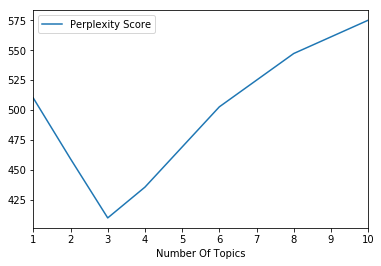

In [29]:
df_perplexity.plot.line("Number Of Topics", "Perplexity Score")

In [30]:
#EXERCISE 07
lda = sklearn.decomposition.LatentDirichletAllocation(
    n_components=optimal_num_topics,
    learning_method="online",
    random_state=0
)
lda.fit(clean_vec1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=3, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [31]:
lda_transform = lda.transform(clean_vec1)
print(lda_transform.shape)
print(lda_transform)

(92946, 3)
[[0.04761957 0.90420154 0.0481789 ]
 [0.04166779 0.04553201 0.91280021]
 [0.16625031 0.04701967 0.78673001]
 ...
 [0.0398781  0.51423945 0.44588245]
 [0.06909128 0.86115508 0.06975365]
 [0.46020958 0.21724679 0.32254363]]


In [32]:
lda_components = lda.components_
print(lda_components.shape)
print(lda_components)

(3, 1000)
[[3.35221017e-01 2.63809830e+02 1.51006414e+01 ... 3.35637615e-01
  2.03877943e+02 4.06629495e-01]
 [2.74820206e+02 3.79103974e-01 3.63560078e-01 ... 3.45787545e-01
  1.71738200e+02 4.35314399e+02]
 [3.38720609e-01 8.76200272e+00 2.00434271e+02 ... 2.31709628e+02
  1.27831907e+02 2.70809332e+01]]


In [33]:
def get_topics(mod, vec, names, docs, ndocs, nwords):
    # word to topic matrix
    W = mod.components_
    W_norm = W / W.sum(axis=1)[:, numpy.newaxis]
    # topic to document matrix
    H = mod.transform(vec)
    W_dict = {}
    H_dict = {}
    for tpc_idx, tpc_val in enumerate(W_norm):
        topic = "Topic{}".format(tpc_idx)
        # formatting w
        W_indices = tpc_val.argsort()[::-1][:nwords]
        W_names_values = [
            (round(tpc_val[j], 4), names[j]) 
            for j in W_indices
        ]
        W_dict[topic] = W_names_values
        # formatting h
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j]) 
            for j in H_indices
        ]
        H_dict[topic] = H_names_values
    W_df = pandas.DataFrame(
        W_dict, 
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pandas.DataFrame(
    H_dict,
    index=["Doc" + str(i) for i in range(ndocs)]
    )
    return (W_df, H_df)

In [34]:
W_df, H_df = get_topics(
    mod=lda,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [35]:
print(W_df)

                     Topic0                 Topic1               Topic2
Word0   (0.1058, microsoft)        (0.0899, obama)    (0.0956, economy)
Word1     (0.0242, windows)    (0.0779, president)   (0.0329, economic)
Word2     (0.0237, company)       (0.0448, barack)     (0.0167, growth)
Word3  (0.0191, microsofts)    (0.0163, palestine)      (0.0154, world)
Word4    (0.0161, announce)        (0.014, obamas)     (0.0141, global)
Word5       (0.0145, today)        (0.0138, state)  (0.012, government)
Word6     (0.0108, release)   (0.0134, washington)   (0.0113, minister)
Word7      (0.0091, update)  (0.0127, palestinian)       (0.011, china)
Word8    (0.0088, business)        (0.0116, house)    (0.0103, percent)
Word9     (0.0077, surface)        (0.0106, white)    (0.0097, country)


In [36]:
print(H_df)

                                                 Topic0  \
Doc0  (0.9776, That appears to be the thinking behin...   
Doc1  (0.9763, &quot;We have put the utmost priority...   
Doc2  (0.9757, France's fragile economy has cooled i...   
Doc3  (0.9755, US President Barack Obama on Wednesda...   
Doc4  (0.9754, WASHINGTON (AP) — President Barack Ob...   
Doc5  (0.9754, Software maker Microsoft Corp is sell...   
Doc6  (0.9752, President Barack Obama signed a bill ...   
Doc7  (0.975, President Barack Obama has told Vladim...   
Doc8  (0.975, YOU may already be reading this on Chr...   
Doc9  (0.9749, The Estonian economy was also positiv...   

                                                 Topic1  \
Doc0  (0.9775, Washington (CNN) President Barack Oba...   
Doc1  (0.9775, Kantor says South Africa's monetary p...   
Doc2  (0.9773, Malia Obama is 17 and probably wants ...   
Doc3  (0.9772, Finance Minister Bill English said th...   
Doc4  (0.9771, WASHINGTON — President Barack Obama s...

In [37]:
#EXERCISE 08
lda_plot = pyLDAvis.sklearn.prepare(lda, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda_plot)

C:\Users\rutujay\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [38]:
def plot_tsne(data, threshold):
    # filter data according to threshold
    index_meet_threshold = numpy.amax(data, axis=1) >= threshold
    lda_transform_filt = data[index_meet_threshold]
    # fit tsne model
    # x-d -> 2-d, x = number of topics
    tsne = sklearn.manifold.TSNE(
        n_components=2, 
        verbose=0, 
        random_state=0, 
        angle=0.5, 
        init='pca'
    )
    tsne_fit = tsne.fit_transform(lda_transform_filt)
    # most probable topic for each headline
    most_prob_topic = []
    for i in range(tsne_fit.shape[0]):
        most_prob_topic.append(lda_transform_filt[i].argmax())
    print("LENGTH:\n{}\n".format(len(most_prob_topic)))
    unique, counts = numpy.unique(
        numpy.array(most_prob_topic), 
        return_counts=True
    )
    print("COUNTS:\n{}\n".format(numpy.asarray((unique, counts)).T))
    # make plot
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i in list(set(most_prob_topic)):
        indices = [
idx for idx, val in enumerate(most_prob_topic) if val == i
]
        matplotlib.pyplot.scatter(
            x=tsne_fit[indices, 0], 
            y=tsne_fit[indices, 1], 
            s=0.5, 
            c=color_list[i], 
            label='Topic' + str(i),
            alpha=0.25
        )

    matplotlib.pyplot.xlabel('x-tsne')
    matplotlib.pyplot.ylabel('y-tsne')
    matplotlib.pyplot.legend(markerscale=10)

LENGTH:
56898

COUNTS:
[[    0 14813]
 [    1 22629]
 [    2 19456]]



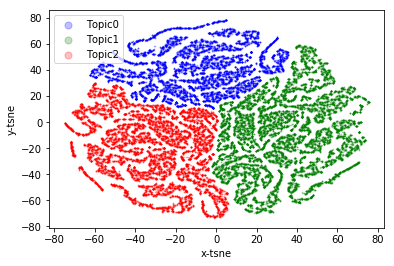

In [39]:
plot_tsne(data=lda_transform, threshold=0.75)

In [40]:
lda4 = sklearn.decomposition.LatentDirichletAllocation(
    n_components=4,  # number of topics data suggests
    learning_method="online",
    random_state=0
)
lda4.fit(clean_vec1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [41]:
W_df4, H_df4 = get_topics(
    mod=lda4,
    vec=clean_vec1,
    names=feature_names_vec1,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)

In [42]:
print(W_df4)

                   Topic0                    Topic1                 Topic2  \
Word0   (0.0888, economy)           (0.1071, obama)      (0.0625, economy)   
Word1  (0.0512, economic)       (0.0929, president)    (0.0285, palestine)   
Word2    (0.0219, global)          (0.0534, barack)        (0.0249, world)   
Word3    (0.0178, report)          (0.0167, obamas)   (0.0195, government)   
Word4  (0.0176, minister)      (0.0159, washington)      (0.0167, percent)   
Word5    (0.0147, market)           (0.0143, state)        (0.0152, month)   
Word6     (0.0142, china)           (0.0138, house)        (0.0147, first)   
Word7    (0.0139, growth)           (0.0127, white)      (0.0145, quarter)   
Word8      (0.012, could)  (0.0124, administration)  (0.0133, palestinian)   
Word9   (0.0112, country)           (0.0093, visit)       (0.0125, growth)   

                     Topic3  
Word0   (0.1202, microsoft)  
Word1     (0.0275, windows)  
Word2     (0.0269, company)  
Word3  (0.0217, micro

In [43]:
print(H_df4)

                                                 Topic0  \
Doc0  (0.968, German businesses are confident about ...   
Doc1  (0.9571, Canmore is preparing for another good...   
Doc2  (0.9527, Microsoft's Android applications cont...   
Doc3  (0.9527, Rajan, known to have frank views on s...   
Doc4  (0.9499, The Community Sector Council has pres...   
Doc5  (0.9499, #microsoft landing. # microsoft-landi...   
Doc6  (0.9499, I FIRST met Larraine when we both liv...   
Doc7  (0.9493, Industrial production fell more than ...   
Doc8  (0.9491, As a one-woman enterprise, she can be...   
Doc9  (0.9484, President Barack Obama discusses crim...   

                                                 Topic1  \
Doc0  (0.9751, Finance Minister Bill English said th...   
Doc1  (0.9719, Yet another poll is out showing that ...   
Doc2  (0.9697, ASSOCIATED PRESS/CHARLES DHARAPAK. Pr...   
Doc3  (0.9697, Two scholars examine, from the Jewish...   
Doc4  (0.9695, WASHINGTON (AP) -- President Barack O...

In [44]:
lda4_plot = pyLDAvis.sklearn.prepare(lda4, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda4_plot)

C:\Users\rutujay\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [45]:
#EXERCISE 10
vectorizer2 = sklearn.feature_extraction.text.TfidfVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=20, 
    max_features=number_features,
    smooth_idf=False
)
clean_vec2 = vectorizer2.fit_transform(clean_sentences)
print(clean_vec2[0])

  (0, 573)	0.4507771051280328
  (0, 558)	0.4665964149907402
  (0, 645)	0.23483218752458623
  (0, 88)	0.28071329453109684
  (0, 408)	0.6671893861461635


In [46]:
feature_names_vec2 = vectorizer2.get_feature_names()
feature_names_vec2

['abbas',
 'ability',
 'accelerate',
 'accept',
 'access',
 'accord',
 'account',
 'accused',
 'achieve',
 'acknowledge',
 'acquire',
 'acquisition',
 'across',
 'action',
 'activist',
 'activity',
 'actually',
 'addition',
 'address',
 'administration',
 'admit',
 'advance',
 'adviser',
 'affairs',
 'affect',
 'africa',
 'african',
 'afternoon',
 'agency',
 'agenda',
 'agree',
 'agreement',
 'ahead',
 'alberta',
 'allies',
 'allow',
 'almost',
 'along',
 'already',
 'although',
 'always',
 'amazon',
 'america',
 'american',
 'among',
 'amount',
 'analysis',
 'analyst',
 'android',
 'anniversary',
 'announce',
 'announcement',
 'annual',
 'another',
 'answer',
 'antonin',
 'appeal',
 'appear',
 'apple',
 'application',
 'approach',
 'approve',
 'april',
 'arabia',
 'argentina',
 'argue',
 'around',
 'arrive',
 'article',
 'asian',
 'assistant',
 'associate',
 'association',
 'attack',
 'attempt',
 'attend',
 'attention',
 'augment',
 'australia',
 'australian',
 'author',
 'authorities

In [47]:
#EXERCISE 11
nmf = sklearn.decomposition.NMF(
    n_components=4,
    init="nndsvda",
    solver="mu",
    beta_loss="frobenius",
    random_state=0, 
    alpha=0.1, 
    l1_ratio=0.5
)
nmf.fit(clean_vec2)


NMF(alpha=0.1, beta_loss='frobenius', init='nndsvda', l1_ratio=0.5,
  max_iter=200, n_components=4, random_state=0, shuffle=False, solver='mu',
  tol=0.0001, verbose=0)

In [48]:
W_df, H_df = get_topics(
    mod=nmf,
    vec=clean_vec2,
    names=feature_names_vec2,
    docs=raw,
    ndocs=number_docs, 
    nwords=number_words
)


In [49]:
print(W_df)

                         Topic0              Topic1                Topic2  \
Word0           (0.0696, obama)   (0.0628, economy)   (0.0869, microsoft)   
Word1       (0.0646, president)  (0.0212, economic)     (0.0305, windows)   
Word2          (0.0484, barack)    (0.0179, growth)     (0.0196, company)   
Word3      (0.0157, washington)    (0.0144, global)    (0.0162, announce)   
Word4           (0.0149, house)     (0.0128, china)  (0.0124, microsofts)   
Word5           (0.0144, white)   (0.0111, percent)      (0.0117, update)   
Word6          (0.0127, obamas)     (0.0109, world)     (0.0105, release)   
Word7           (0.0109, state)   (0.0097, quarter)         (0.01, today)   
Word8  (0.0096, administration)    (0.0093, market)     (0.0096, surface)   
Word9           (0.0081, first)   (0.0086, country)       (0.0085, cloud)   

                        Topic3  
Word0      (0.0881, palestine)  
Word1    (0.0765, palestinian)  
Word2        (0.0309, israeli)  
Word3         (0.027

In [50]:
print(H_df)

                                                 Topic0  \
Doc0  (0.0845, President Obama met with gun control ...   
Doc1  (0.0845, A makeshift racetrack in the Palestin...   
Doc2  (0.0845, (CNN) """Leaders gathered in Paris to...   
Doc3  (0.0845, The Palestine community pulled togeth...   
Doc4  (0.0845, U.S. Bank Senor Portfolio Manager Eri...   
Doc5  (0.0845, The New York Times' Paul Krugman post...   
Doc6  (0.0845, Negative Interest Rates Benefit Globa...   
Doc7  (0.0845, America is emerging as a top tax have...   
Doc8  (0.0845, AFP ISTANBUL (AFP-Jiji) """ Six suici...   
Doc9  (0.0845, “The possibility of two states, Israe...   

                                                 Topic1  \
Doc0  (0.0677, President Obama gave a somber denounc...   
Doc1  (0.0677, &quot;The economy is doing reasonably...   
Doc2  (0.0677, Both China's central bank and a respe...   
Doc3  (0.0677, President Barack Obama, standing befo...   
Doc4  (0.0677, The Palestinian narrative is rare and...

In [51]:
#EXERCISE 12
nmf_transform = nmf.transform(clean_vec2)
print(nmf_transform.shape)
print(nmf_transform)

(92946, 4)
[[5.12742730e-02 3.67760308e-15 3.15165465e-34 7.99371661e-16]
 [7.40642831e-04 2.04172716e-02 7.14505784e-15 2.12415656e-03]
 [2.96492663e-15 1.94111542e-02 4.39984935e-21 1.25002643e-18]
 ...
 [9.72679860e-06 3.40945454e-03 6.20351113e-04 3.23811713e-02]
 [6.43240789e-07 1.31067832e-07 3.46347825e-08 6.14454524e-02]
 [4.63909836e-05 1.18242467e-04 1.84376178e-02 2.00790554e-03]]


LENGTH:
92946

COUNTS:
[[    0 28973]
 [    1 32947]
 [    2 22148]
 [    3  8878]]



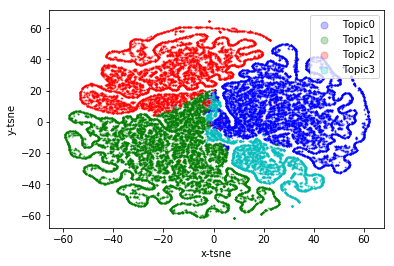

In [52]:
plot_tsne(data=nmf_transform, threshold=0)